"”
<center><span style="font-family:Comic Sans MS; color:navy "><h1>Automated Car Tracking and Traffic Prediction</h1></span></center>

# <b>1 <span style='color:#94D4F6'>|</span> 🏗️Import Necessary Libraries</b>
<div style="color:white;display:fill;border-radius:8px;background-color:#50C7C7;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>1.1 |</span></b> Install ultalytics! </b></p></div>

<span style='font-family:comic Sans MS; color:#63C750'> `ultralytics` is a Python library that simplifies computer vision tasks like object detection and classification. It provides a high-level API built on top of PyTorch for easy development and deployment of computer vision models.<br><br></span>
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

In [1]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Setup complete ✅ (2 CPUs, 15.6 GB RAM, 5016.7/8062.4 GB disk)


<div style="color:white;display:fill;border-radius:8px;background-color:#50C7C7;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>1.2 |</span></b> Import libraries </b></p></div>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg #Importing image module from matplotlib to read images 
import seaborn as sns  #Import Seaborn library to enhance visualization aesthetics
sns.set_style('darkgrid') # Setting darkgrid style for seaborn plots

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

from ultralytics import YOLO # Importing the YOLO object detection model from the Ultralytics library
import squarify # Importing the squarify library for treemapping visualizations
import random # Importing random module for generating random numbers or choices
import os # Importing OS module for operating system related functionalities
import cv2 # Importing OpenCV library for computer vision tasks

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="color:white;display:fill;border-radius:8px;background-color:#50C7C7;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>1.3 |</span></b> Before you start </b></p></div>
<span style='font-family:comic Sans MS; color:#63C750'> Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that</span>


In [3]:
!nvidia-smi

Fri Oct  6 09:45:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# <b>2 <span style='color:#94D4F6'>|</span> Preprocessing</b>
<div style="color:white;display:fill;border-radius:8px;background-color:#50C7C7;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>2.1 |</span></b> 🗂️Dataset Overview </b></p></div>

In [4]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/objectdetectioncar/Update820/train/images"
train_labels = "/kaggle/input/objectdetectioncar/Update820/train/labels"

test_images = "/kaggle/input/objectdetectioncar/Update820/test/images"
test_labels = "/kaggle/input/objectdetectioncar/Update820/test/labels"

val_images = "/kaggle/input/objectdetectioncar/Update820/valid/images"
val_labels = "/kaggle/input/objectdetectioncar/Update820/valid/labels"

In [5]:
# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 6)

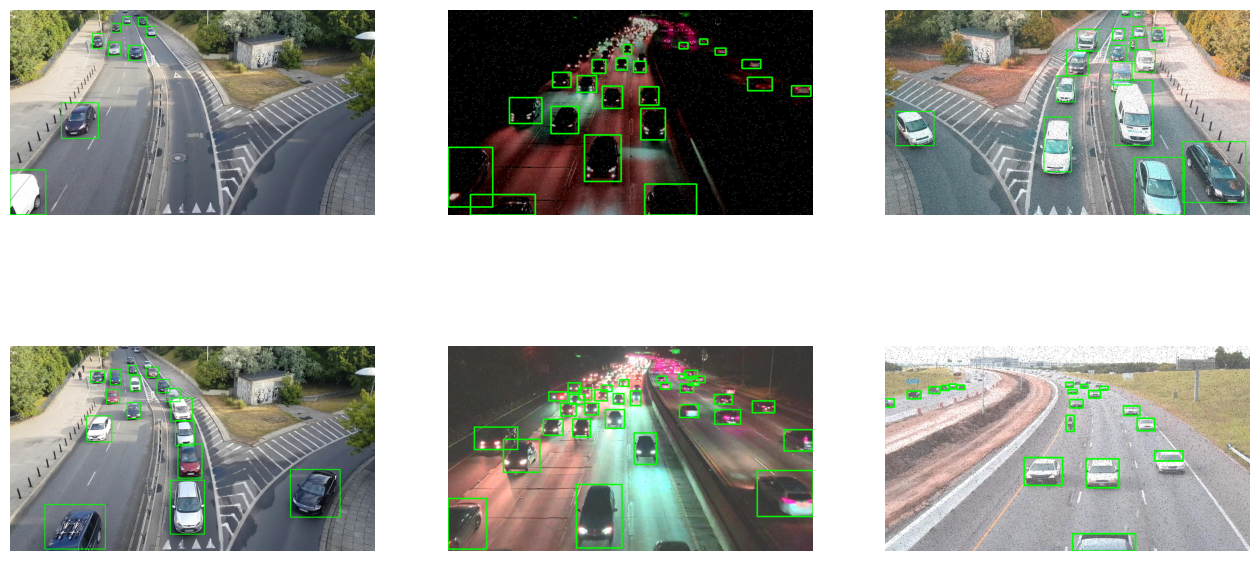

In [6]:
# Set up the plot
fig, axs = plt.subplots(2, 3, figsize=(16,8))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 3
    col = i % 3
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

<div style="color:white;display:fill;border-radius:8px;background-color:#50C7C7;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>2.1 |</span></b> 🖼️Image Metadata </b></p></div>

<span style='font-family:comic Sans MS; color:#63C750'> Before we start training the model, we need to set the size of our photos to a certain size, considering the available resources and the performance of the model.</span>

In [7]:
# Load an image using OpenCV
image = cv2.imread("/kaggle/input/objectdetectioncar/Update820/train/images/0_png.rf.85255ba703f2d5fe68e4250f55a03c4b.jpg")
image = cv2.resize(image, (720, 720))
if image is None:
    print(f"Failed to load image at path: {image_path}")
else:
    height, width, channels = image.shape
    print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 720x720 and 3 channels.


# <b>3 <span style='color:#94D4F6'>|</span> 🚀Model Training</b>

In [8]:
 # Loading a pretrained model
model = YOLO('yolov8n.pt')
# Training the model
model.train(data = '/kaggle/input/objectdetectioncar/Update820/data.yaml',
            epochs = 50,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

100%|██████████| 6.23M/6.23M [00:00<00:00, 116MB/s]
Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/objectdetectioncar/Update820/data.yaml, epochs=50, patience=50, batch=8, imgsz=720, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e6350a066b0>
fitness: 0.35282025684445334
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.1592,     0.46296,     0.43135,     0.27441])
names: {0: 'bike', 1: 'bus', 2: 'car', 3: 'truck'}
plot: True
results_dict: {'metrics/precision(B)': 0.5984174427197899, 'metrics/recall(B)': 0.552276780994764, 'metrics/mAP50(B)': 0.5403979688588127, 'metrics/mAP50-95(B)': 0.33197828884285785, 'fitness': 0.35282025684445334}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 2.9719721886419483, 'inference': 5.215052635438981, 'loss': 0.000961365238312752, 'postprocess': 3.2600741232595136}

# <b>3 <span style='color:#94D4F6'>|</span> 📐Evaluation</b>
<div style="color:white;display:fill;border-radius:8px;background-color:#50C7C7;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>2.1 |</span></b>📈Model Performance </b></p></div>

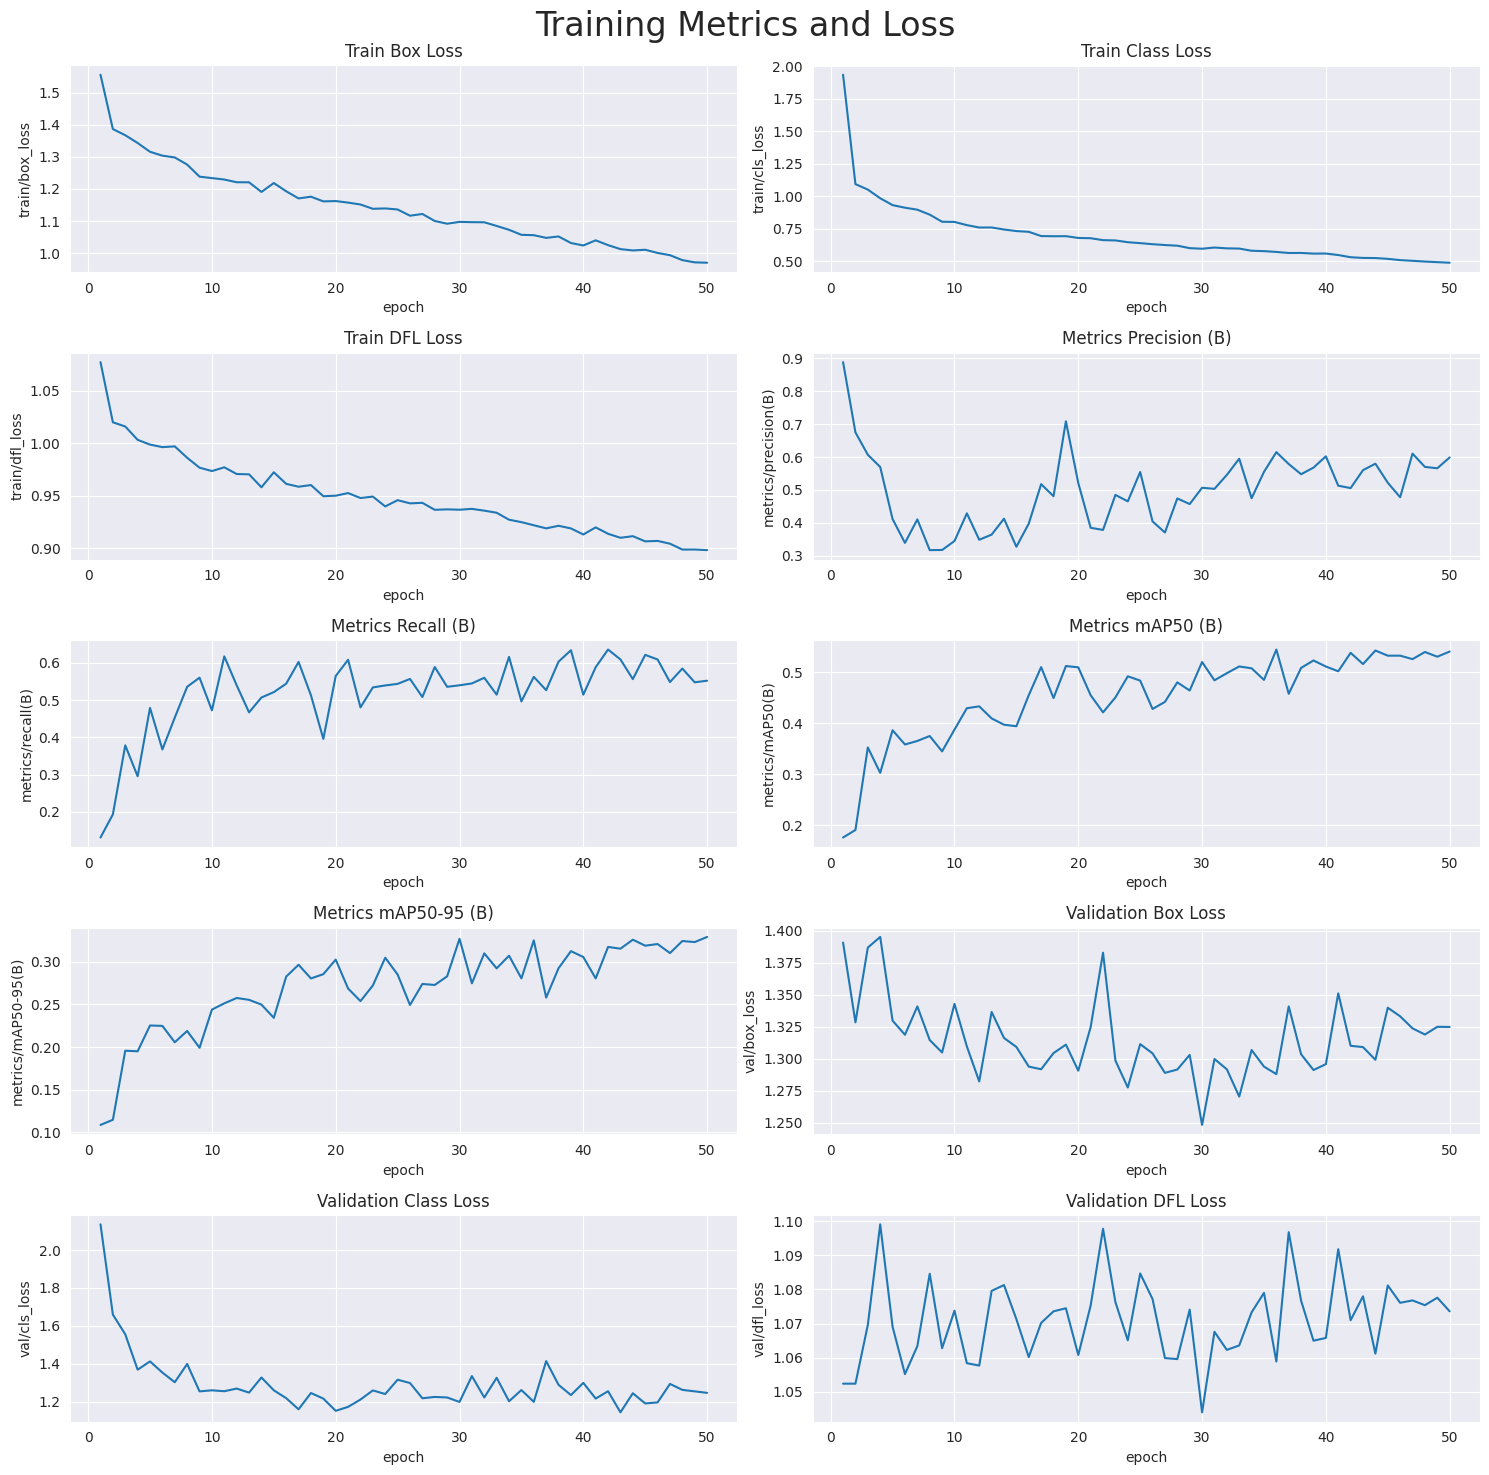

In [9]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

<div style="color:white;display:fill;border-radius:8px;background-color:#50C7C7;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>2.1 |</span></b>📊mAP Metrics </b></p></div>

<span style='font-family:comic Sans MS; color:navy'>Load the best performing model: </span>

In [10]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.194 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/input/objectdetectioncar/Update820/test/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 43.05it/s]
val: WARNING ⚠️ Cache directory /kaggle/input/objectdetectioncar/Update820/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]
                   all         20        351      0.513      0.468      0.487      0.307
                  bike         20         19        0.5      0.368      0.361      0.191
                   bus         20         18      0.333      0.444       0.44      0.368
                   car         20        298      0.791      0.685      0.747      0.451
                 truck         20         16      0.429      0.

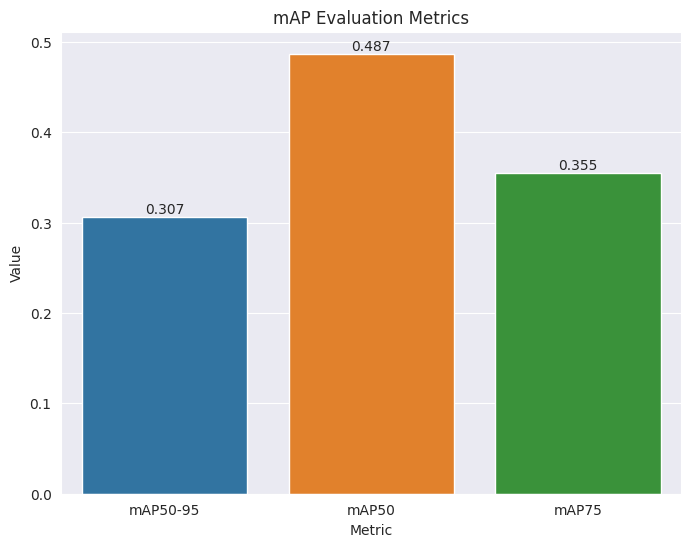

In [11]:
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('mAP Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

<div style="color:white;display:fill;border-radius:8px;background-color:#50C7C7;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>2.1 |</span></b> 🏁Confusion Matrix</b></p></div>

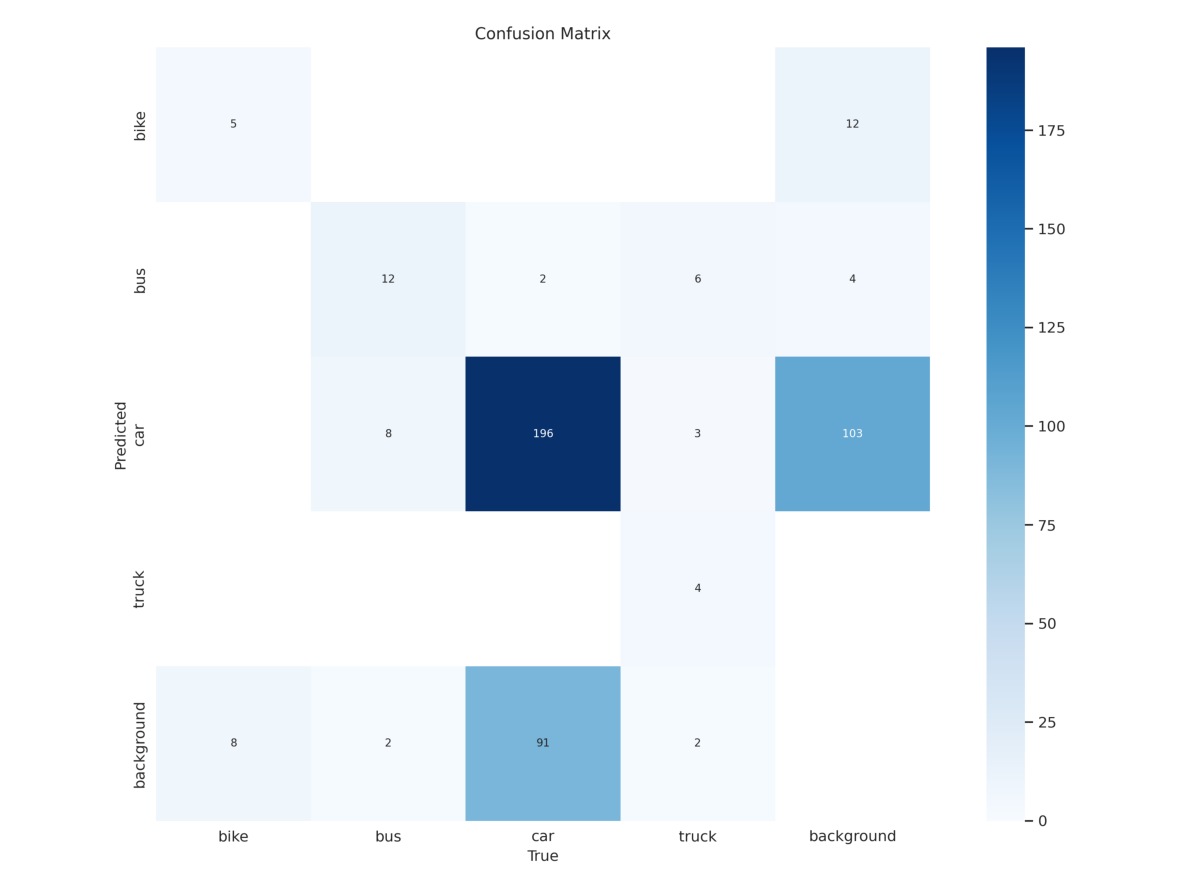

In [12]:
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

<div style="color:white;display:fill;border-radius:8px;background-color:#50C7C7;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>2.1 |</span></b> 🔮Predictions</b></p></div>

In [13]:
def car_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 736x736 5 bikes, 1 bus, 14 cars, 5.5ms
Speed: 3.1ms preprocess, 5.5ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 736)

0: 736x736 2 bikes, 2 buss, 9 cars, 1 truck, 5.6ms
Speed: 4.0ms preprocess, 5.6ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 736)

0: 416x736 1 bus, 13 cars, 1 truck, 48.3ms
Speed: 3.4ms preprocess, 48.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 736x736 1 bike, 9 cars, 6.5ms
Speed: 4.0ms preprocess, 6.5ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 736)

0: 736x736 1 bike, 16 cars, 5.5ms
Speed: 3.8ms preprocess, 5.5ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 736)

0: 416x736 1 bike, 1 bus, 7 cars, 5.9ms
Speed: 3.3ms preprocess, 5.9ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 bike, 1 bus, 11 cars, 5.6ms
Speed: 3.5ms preprocess, 5.6ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 736)

0: 416x736 1 bus, 14 cars, 1 truck,

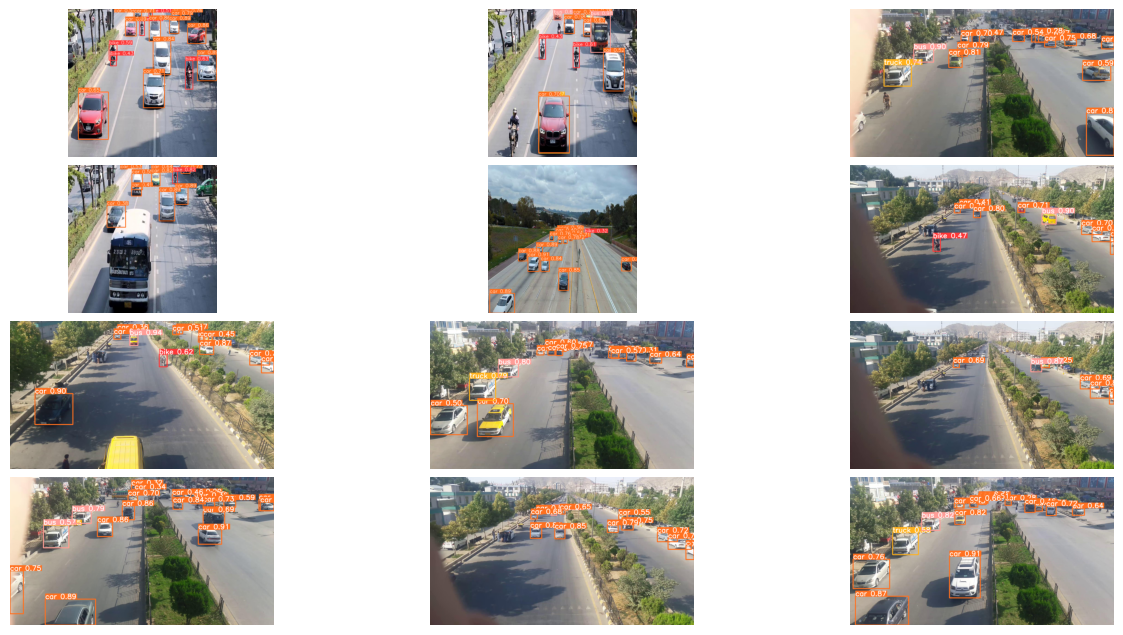

In [14]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/objectdetectioncar/Update820/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 12)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 8))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 3
    col_idx = i % 3
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = car_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots

plt.subplots_adjust(wspace=0.05, hspace=0.05)